In [126]:
# imports
import sys
sys.path.append('../')

from glob import glob
from src.load_data import master_load
import matplotlib.pyplot as plt
import numpy as np
import os
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Activation, BatchNormalization, Conv1D, Dense,
                                     Dropout, Flatten, MaxPooling1D, Reshape)
from tensorflow.math import confusion_matrix

In [2]:
# set plotting params
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 32
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 32
plt.rcParams['figure.titlesize'] = 48

In [3]:
X_train, X_test, y_train, y_test = master_load()

In [43]:
# modified
model = Sequential()

model.add(Conv1D(64, (3), input_shape=X_train.shape[1:]))
model.add(Activation('selu'))

model.add(Conv1D(64, (2)))
model.add(Activation('selu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(64, (2)))
model.add(Activation('selu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(4))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [122]:
# stolen 1
model = Sequential()

model.add(Conv1D(64, (3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv1D(128, (2)))
model.add(Activation('relu'))

model.add(Conv1D(128, (2)))
model.add(Activation('relu'))

model.add(Conv1D(64, (2)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(64, (2)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Dense(256))
model.add(Dense(128))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [130]:
reshape = (-1, 16, 60)

train_X = np.clip(np.array(X_train).reshape(reshape), -10, 10) / 10
test_X = np.clip(np.array(X_test).reshape(reshape), -10, 10) / 10

In [133]:
# stolen 2
model = Sequential()

model.add(Conv1D(64, (5), padding='same', input_shape=train_X.shape[1:]))
model.add(Activation('relu'))

model.add(Conv1D(128, (5), padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(256, (5), padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(512, (5), padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(3, (16)))
model.add(Reshape((3,)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [134]:
epochs = 5

batch_size = 64

for epoch in range(epochs):
    model.fit(train_X, y_train, batch_size=batch_size, epochs=1, validation_data=(test_X, y_test))
    score = model.evaluate(X_test, y_test, batch_size=batch_size)
    
    model_name = f'../models/numpy/acc_{round(score[1], 3)}-loss_{round(score[0], 2)}-{int(time.time())}.model'
    model.save(model_name)
    
print('done')

551/551 [==============================] - 7s 13ms/step - loss: 17.3167 - accuracy: 0.3742
INFO:tensorflow:Assets written to: ../models/numpy/acc_0.374-loss_17.32-1628143370.model/assets
551/551 [==============================] - 7s 13ms/step - loss: 17.4850 - accuracy: 0.3793
INFO:tensorflow:Assets written to: ../models/numpy/acc_0.379-loss_17.49-1628143543.model/assets
551/551 [==============================] - 7s 13ms/step - loss: 22.8026 - accuracy: 0.3965
INFO:tensorflow:Assets written to: ../models/numpy/acc_0.397-loss_22.8-1628143717.model/assets
551/551 [==============================] - 7s 13ms/step - loss: 32.1730 - accuracy: 0.3992
INFO:tensorflow:Assets written to: ../models/numpy/acc_0.399-loss_32.17-1628143890.model/assets
551/551 [==============================] - 7s 12ms/step - loss: 31.6478 - accuracy: 0.4002
INFO:tensorflow:Assets written to: ../models/numpy/acc_0.4-loss_31.65-1628144068.model/assets
done


In [119]:
def plot_conf_mat(conf_mat):
    actions = ['left', 'none', 'right']

    fig, ax = plt.subplots(figsize=(16, 9))

    ax.matshow(conf_mat, cmap=plt.cm.RdYlGn)
    ax.set_xticklabels([""]+actions)
    ax.set_yticklabels([""]+actions)

    for idx, i in enumerate(conf_mat):
        for idx2, ii in enumerate(conf_mat[idx]):
            ax.text(idx, idx2, f"{conf_mat[idx][idx2]}", va='center', ha='center')

    plt.title("Action Thought")
    plt.ylabel("Predicted Action")
    plt.show()

In [135]:
model_name = '../models/numpy/acc_0.4-loss_31.65-1628144068.model'
model = tf.keras.models.load_model(model_name)

In [136]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [137]:
y_true = np.argmax(y_test, axis=-1)

In [155]:
conf_mat = np.round(np.array(confusion_matrix(y_true, y_pred)) / 11750, 3)

In [156]:
conf_mat

array([[0.429, 0.202, 0.369],
       [0.353, 0.45 , 0.196],
       [0.433, 0.245, 0.322]])

tf [0.429 0.202 0.369]
tf [0.353 0.45  0.196]
tf [0.433 0.245 0.322]


<ipython-input-119-12f0b58415ba>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+actions)
<ipython-input-119-12f0b58415ba>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""]+actions)


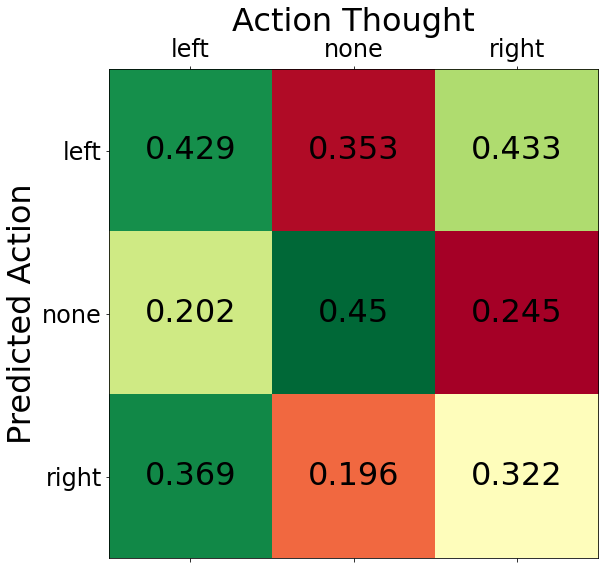

In [157]:
plot_conf_mat(conf_mat)